In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('img/einstein.jpg')

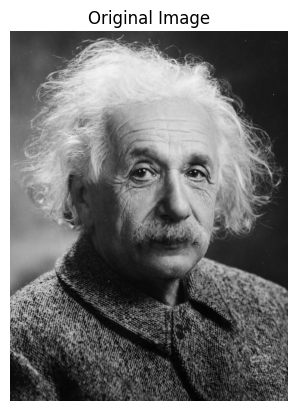

In [13]:
# Original image
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


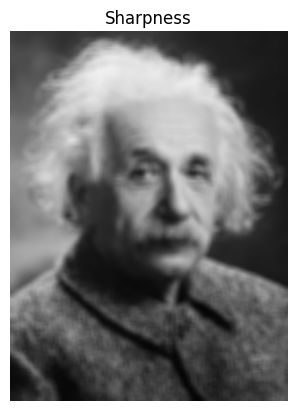

In [38]:
# Apply Gaussian blur
blurred_image = cv2.blur(image, (20,20))

# Blurred image
plt.figure()
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpness')
plt.axis('off')
plt.show()


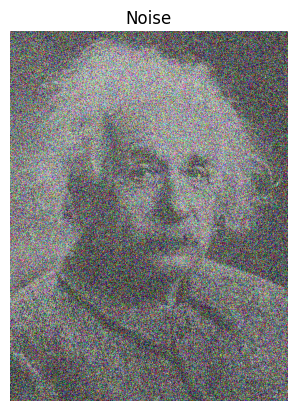

In [15]:
# Add Gaussian noise
mean = 0
std_dev = 255
noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

# Noisy image
plt.figure()
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noise')
plt.axis('off')

plt.show()

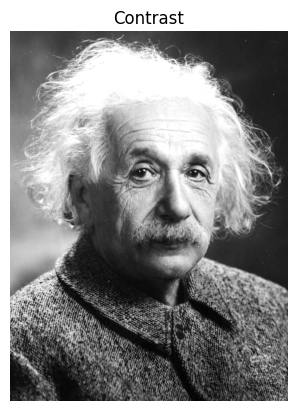

In [16]:
# Define contrast factor (e.g., 1.5 for 1.5 times contrast)
contrast_factor = 1.2

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Increase contrast by multiplying pixel values by contrast factor
increased_contrast_image = np.clip(gray_image * contrast_factor, 0, 255).astype(np.uint8)

# Contrast-increased image
plt.figure()
plt.imshow(increased_contrast_image, cmap='gray')
plt.title('Contrast')
plt.axis('off')
plt.show()

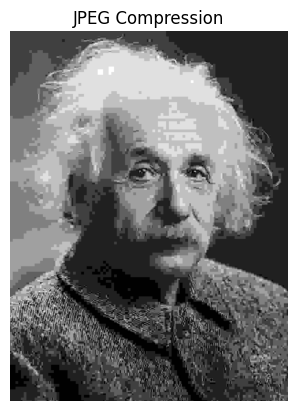

In [17]:
# Define the compression quality (0-100, higher is better)
compression_quality = 0  # Low quality setting

# Encode the image with JPEG compression using the specified quality
encoded_image = cv2.imencode('.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, compression_quality])[1]

# Decode the JPEG data
decoded_image = cv2.imdecode(encoded_image, cv2.IMREAD_COLOR)
compressed = decoded_image

# Compressed image
plt.figure()
plt.imshow(cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB))
plt.title('JPEG Compression')
plt.axis('off')

plt.show()

# Mean Squared Error

(-0.5, 811.5, 1081.5, -0.5)

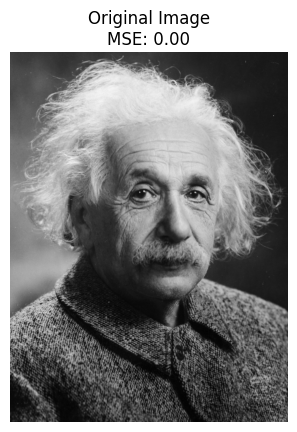

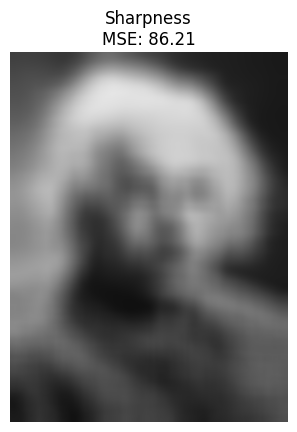

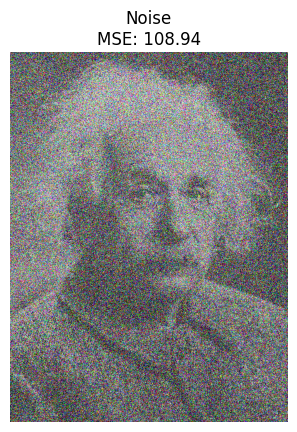

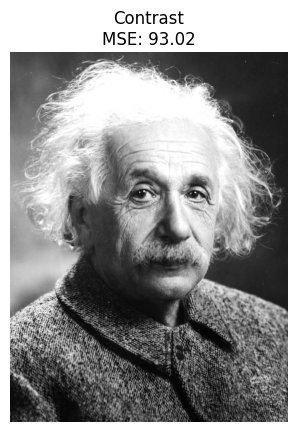

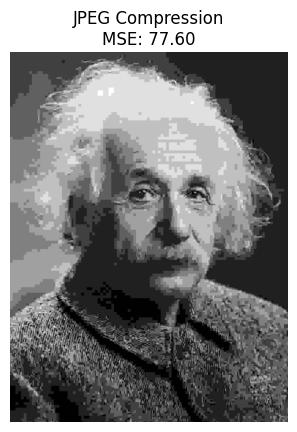

In [18]:
import numpy as np

# Original
mse = np.mean((image - image) ** 2)
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Original Image\nMSE: {mse:.2f}')
plt.axis('off')
# Blured
mse = np.mean((image - blurred_image) ** 2)
plt.figure()
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title(f'Sharpness\nMSE: {mse:.2f}')
plt.axis('off')
# Noise
mse = np.mean((image - noisy_image) ** 2)
plt.figure()
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title(f'Noise\nMSE: {mse:.2f}')
plt.axis('off')
# Contrast
mse = np.mean((image - np.stack((increased_contrast_image,) * 3, axis=-1)) ** 2)
plt.figure()
plt.imshow(cv2.cvtColor(increased_contrast_image, cv2.COLOR_BGR2RGB))
plt.title(f'Contrast\nMSE: {mse:.2f}')
plt.axis('off')
# JPEG Compression
mse = np.mean((image - compressed) ** 2)
plt.figure()
plt.imshow(cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB))
plt.title(f'JPEG Compression\nMSE: {mse:.2f}')
plt.axis('off')

# Peak Signal to Noise Ratio

/tmp/ipykernel_4982/3490094543.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  psnr = 10 * np.log10(max_i**2 / mse)


(-0.5, 811.5, 1081.5, -0.5)

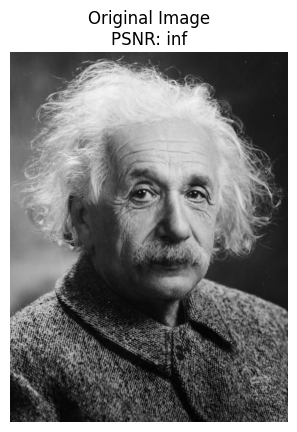

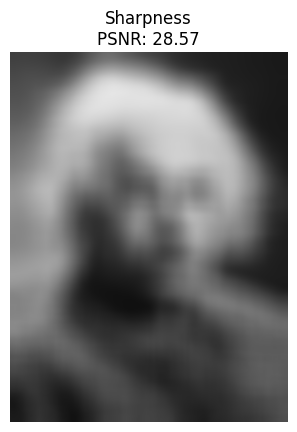

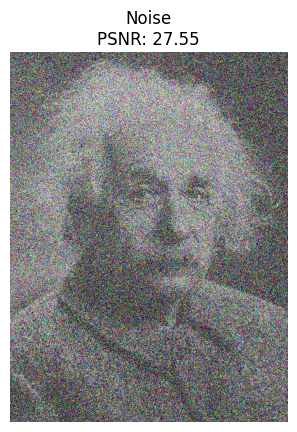

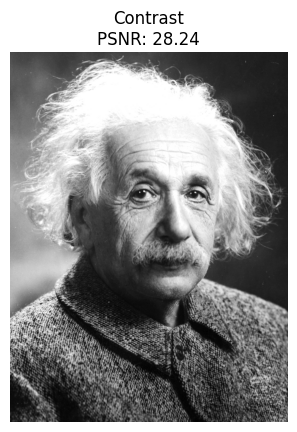

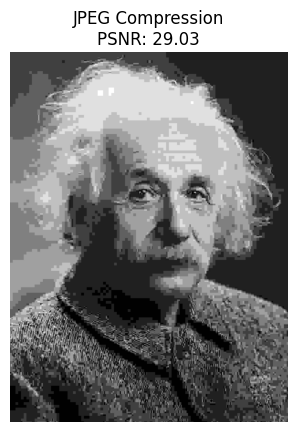

In [19]:
# Calculate the maximum pixel value
max_i = np.max(image)

# Original
mse = np.mean((image - image) ** 2)
psnr = 10 * np.log10(max_i**2 / mse)
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Original Image\nPSNR: {psnr:.2f}')
plt.axis('off')
# Blured
mse = np.mean((image - blurred_image) ** 2)
psnr = 10 * np.log10(max_i**2 / mse)
plt.figure()
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title(f'Sharpness\nPSNR: {psnr:.2f}')
plt.axis('off')
# Noise
mse = np.mean((image - noisy_image) ** 2)
psnr = 10 * np.log10(max_i**2 / mse)
plt.figure()
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title(f'Noise\nPSNR: {psnr:.2f}')
plt.axis('off')
# Contrast
mse = np.mean((image - np.stack((increased_contrast_image,) * 3, axis=-1)) ** 2)
psnr = 10 * np.log10(max_i**2 / mse)
plt.figure()
plt.imshow(cv2.cvtColor(increased_contrast_image, cv2.COLOR_BGR2RGB))
plt.title(f'Contrast\nPSNR: {psnr:.2f}')
plt.axis('off')
# JPEG Compression
mse = np.mean((image - compressed) ** 2)
psnr = 10 * np.log10(max_i**2 / mse)
plt.figure()
plt.imshow(cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB))
plt.title(f'JPEG Compression\nPSNR: {psnr:.2f}')
plt.axis('off')

# Structural Similarity Index SSIM

In [20]:
image[-1].shape

(812, 3)

(-0.5, 811.5, 1081.5, -0.5)

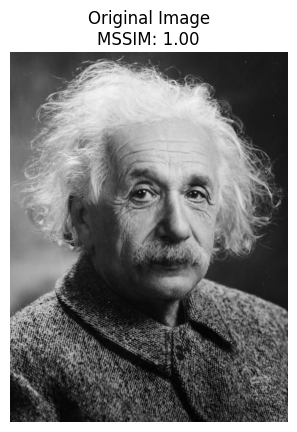

In [22]:

from skimage.metrics import structural_similarity as ssim
# Original
ssim_score, _ = ssim(image, image, full=True, channel_axis=-1)
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Original Image\nMSSIM: {ssim_score:.2f}')
plt.axis('off')

(-0.5, 811.5, 1081.5, -0.5)

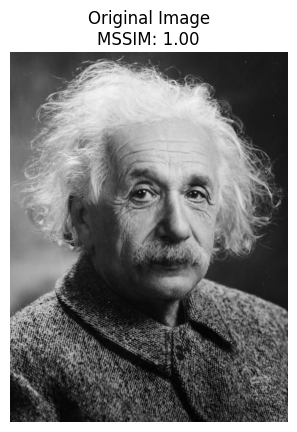

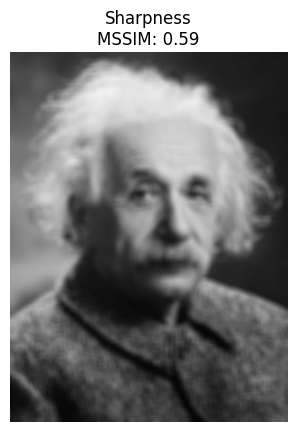

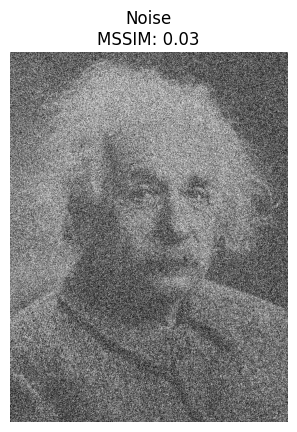

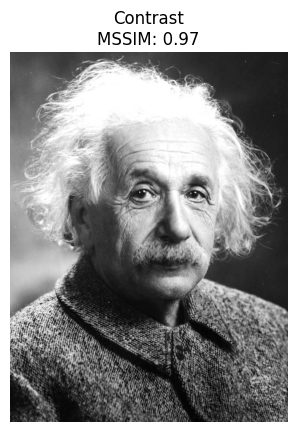

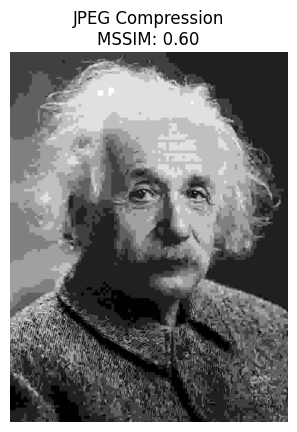

In [40]:
from skimage.metrics import structural_similarity as ssim
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
# noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
# increased_contrast_image = cv2.cvtColor(increased_contrast_image, cv2.COLOR_BGR2GRAY)
# compressed = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)
# Original
ssim_score, _ = ssim(image, image, full=True, channel_axis=-1)
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Original Image\nMSSIM: {ssim_score:.2f}')
plt.axis('off')
# Blured
ssim_score, _ = ssim(image, blurred_image, full=True, channel_axis=-1)
plt.figure()
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title(f'Sharpness\nMSSIM: {ssim_score:.2f}')
plt.axis('off')
# Noise
ssim_score, _ = ssim(image, noisy_image, full=True, channel_axis=-1)
plt.figure()
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title(f'Noise\nMSSIM: {ssim_score:.2f}')
plt.axis('off')
# Contrast
ssim_score, _ = ssim(image, increased_contrast_image, full=True, channel_axis=-1)
plt.figure()
plt.imshow(cv2.cvtColor(increased_contrast_image, cv2.COLOR_BGR2RGB))
plt.title(f'Contrast\nMSSIM: {ssim_score:.2f}')
plt.axis('off')
# JPEG Compression
ssim_score, _ = ssim(image, compressed, full=True, channel_axis=-1)
plt.figure()
plt.imshow(cv2.cvtColor(compressed, cv2.COLOR_BGR2RGB))
plt.title(f'JPEG Compression\nMSSIM: {ssim_score:.2f}')
plt.axis('off')

(-0.5, 811.5, 1081.5, -0.5)

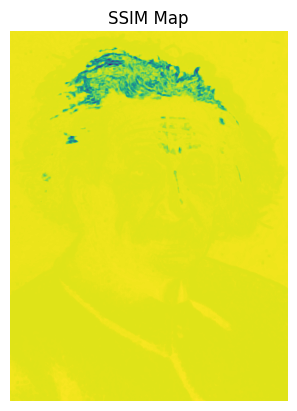

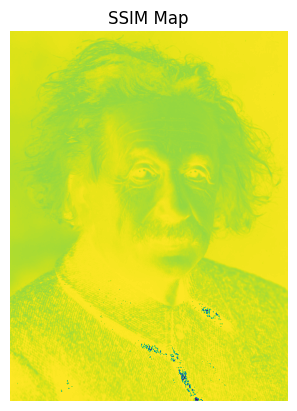

In [43]:
# Calculate SSIM
ssim_score, ssim_map = ssim(image, increased_contrast_image, multichannel=True, full=True)

# Calculate the Absolute Index Map
abs_index_map = np.abs(image - increased_contrast_image)

plt.figure()
plt.imshow(ssim_map)
plt.title('SSIM Map')
plt.axis('off')

plt.figure()
plt.imshow(abs_index_map, cmap='gray')
plt.title('SSIM Map')
plt.axis('off')